## Blue Jean Pocket Size

**Overview:**

If you're on social media at all, you've seen the memes or videos. It seems like such a small thing, a pocket, doesn't it? When I think about my favorite jeans though, they're always the most comfortable ones with the best sized pockets. A lot of content online points to women's clothing either not having pockets at all, having fake pockets, or having tiny and unusable pockets. I found this to be a very interesting question and want to see how common this is. I also want to see at what magnitude pocket size varies in blue jeans, not only between genders, but also between jean styles.

Dataset from: https://github.com/the-pudding/data/tree/master/pockets
Measurements took place inside brick and mortar stores on men's and women's jeans and were recorded on a data collection sheet.
Jean pockets of 20 major brands with a 32" waistband were measured for height and width of their pockets. All measurements are recorded in centimeters.
This dataset contains 80 rows and twenty fields and was completed in 2018 by Jan  Diehm and Amber Thomas from *The Pudding* web publication.

**Questions I hope to answer**

1. Is there a difference in pocket size between skinny and straight leg jeans?
2. Is there a difference in pocket size between men's and women's jeans?
3. What are the top 5 jeans with the largest pockets?


In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
sns.set()
from scipy.stats.stats import ttest_ind

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# upload csv file from local drive
from google.colab import files
uploaded = files.upload()

Saving jeans pocket measurements.csv to jeans pocket measurements (1).csv


In [ ]:
# store dataset in a Pandas DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded["jeans pocket measurements.csv"]))

In [ ]:
# look at the DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             80 non-null     object 
 1   style             80 non-null     object 
 2   menWomen          80 non-null     object 
 3   name              80 non-null     object 
 4   fabric            80 non-null     object 
 5   price             80 non-null     float64
 6   maxHeightFront    80 non-null     float64
 7   minHeightFront    80 non-null     float64
 8   rivetHeightFront  80 non-null     float64
 9   maxWidthFront     80 non-null     float64
 10  minWidthFront     80 non-null     float64
 11  minAreaFront      80 non-null     float64
 12  maxAreaFront      80 non-null     float64
 13  maxHeightBack     80 non-null     float64
 14  minHeightBack     80 non-null     float64
 15  maxWidthBack      80 non-null     float64
 16  minWidthBack      80 non-null     float64
 17 

In [ ]:
# first four rows of DataFrame
df.head()

,brand,style,menWomen,name,fabric,price,maxHeightFront,minHeightFront,rivetHeightFront,maxWidthFront,minWidthFront,minAreaFront,maxAreaFront,maxHeightBack,minHeightBack,maxWidthBack,minWidthBack,minAreaBack,maxAreaBack,cutout
0,Arizona,skinny,women,Fave Super Skinny,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,15.0,6.5,16.5,13.0,195.0,239.25,15.0,12.2,13.7,12.0,146.40,205.50,False
1,Arizona,straight,women,Perfect Boot,"78% cotton, 20% polyester, 2% spandex",42.0,14.5,14.0,6.5,16.0,12.5,175.0,232.00,15.5,12.2,13.0,11.2,136.64,201.50,False
2,Ralph Lauren,skinny,women,Modern Skinny Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,162.0,188.50,15.5,13.0,13.5,12.5,162.50,209.25,False
3,Ralph Lauren,straight,women,Premier Straight Slimming Fit,"92% cotton, 7% poly, 1% elastane",89.5,13.0,13.5,6.5,14.5,12.0,162.0,188.50,14.5,13.0,13.0,12.2,158.60,188.50,False
4,Uniqlo,skinny,women,Skinny Fit,"87% cotton, 9% polyester, 4% spandex",39.9,13.0,13.0,5.5,14.0,11.5,149.5,182.00,14.0,12.0,14.2,11.7,140.40,198.80,False


In [ ]:
# descriptive statistics for front and back pocket area
df[["maxAreaFront","maxAreaBack"]].describe()

,maxAreaFront,maxAreaBack
count,80.000000,80.000000
mean,298.187375,210.765000
std,90.728238,21.548708
min,162.500000,149.500000
25%,214.500000,195.750000
50%,309.750000,209.625000
75%,375.437500,224.000000
max,481.250000,263.500000


[Text(0.5, 0, 'Max Front Pocket Area in square cm')]

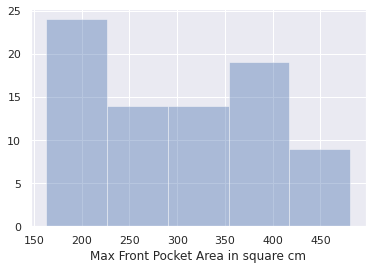

In [ ]:
# histogram distribution of maximum front pocket area in square centimeters 
ax = sns.distplot(df["maxAreaFront"], kde=False)

# change x-axis label
ax.set(xlabel= "Max Front Pocket Area in square cm")

[Text(0.5, 0, 'Max Back Pocket Area in square cm')]

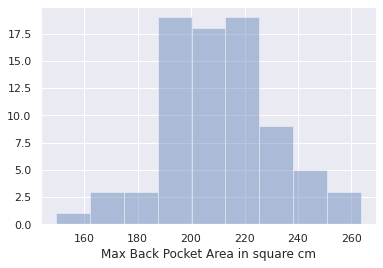

In [ ]:
# histogram distribution of maximum back pocket area in square centimeters
ax = sns.distplot(df["maxAreaBack"], kde=False)

# change x-axis label
ax.set(xlabel= "Max Back Pocket Area in square cm")

## Descriptive Analysis Conclusion

I'm seeing a somewhat normal distribution in front pocket size and a completely normal distribution in back pocket size. I feel confident in moving forward with running statistical analysis on these values

## Hypothesis #1
**Hypothesis:** There is no difference in pocket size between skinny and straight leg jeans.

$H_0$: $\mu_1$  - $\mu_2$ = 0

$H_a$: $\mu_1$ - $\mu_2$ != 0

In these hypotheses, $\mu_1$ and $\mu_2$ are referring to max pocket area in skinny jeans and straight leg jeans respectively

In [ ]:
#import stats
from scipy import stats

In [ ]:
# splitting the DataFrame into two sample populations based on jean style
astyle = df.loc[df["style"]=="skinny"]
bstyle = df.loc[df["style"]=="straight"]
astyle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 79
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             40 non-null     object 
 1   style             40 non-null     object 
 2   menWomen          40 non-null     object 
 3   name              40 non-null     object 
 4   fabric            40 non-null     object 
 5   price             40 non-null     float64
 6   maxHeightFront    40 non-null     float64
 7   minHeightFront    40 non-null     float64
 8   rivetHeightFront  40 non-null     float64
 9   maxWidthFront     40 non-null     float64
 10  minWidthFront     40 non-null     float64
 11  minAreaFront      40 non-null     float64
 12  maxAreaFront      40 non-null     float64
 13  maxHeightBack     40 non-null     float64
 14  minHeightBack     40 non-null     float64
 15  maxWidthBack      40 non-null     float64
 16  minWidthBack      40 non-null     float64
 17 

In [ ]:
# independent samples t-test on max front pocket area for skinny and straight style jeans
stats.ttest_ind(astyle["maxAreaFront"], bstyle["maxAreaFront"])

Ttest_indResult(statistic=-0.397508189103932, pvalue=0.6920785003547107)

In [ ]:
# independent samples t-test on max back pocket area for skinny and straight style jeans
stats.ttest_ind(astyle["maxAreaBack"], bstyle["maxAreaBack"])

Ttest_indResult(statistic=-1.1738198976154692, pvalue=0.2440388707334372)

p-values greater than .05 show us that there's no significant difference in front and back pocket size between jean styles

In [ ]:
# defining variables for confidence intervals for front pocket area by jeans style
sample_1_n = astyle.shape[0]
sample_2_n = bstyle.shape[0]
sample_1_mean = astyle["maxAreaFront"].mean()
sample_2_mean = bstyle["maxAreaFront"].mean()
sample_1_var = astyle["maxAreaFront"].var()
sample_2_var = bstyle["maxAreaFront"].var()

In [ ]:
# import math library
import math


In [ ]:
# defining 95% confidence interval function and calling it for front pocket area by jeans style
# and returning the result
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(astyle["maxAreaFront"],bstyle["maxAreaFront"])

'The difference in means at the 95% confidence interval (two-tail) is between -31.86926289078385 and 48.08476289078376.'

In [ ]:
# defining variables for confidence intervals for front pocket area by jeans style
sample_1_n = astyle.shape[0]
sample_2_n = bstyle.shape[0]
sample_1_mean = astyle["maxAreaBack"].mean()
sample_2_mean = bstyle["maxAreaBack"].mean()
sample_1_var = astyle["maxAreaBack"].var()
sample_2_var = bstyle["maxAreaBack"].var()

In [ ]:
# calling 95% confidence interval function for back pocket area by jeans style and returning the result
get_95_ci(astyle["maxAreaBack"],bstyle["maxAreaBack"])

'The difference in means at the 95% confidence interval (two-tail) is between -3.7791327585400314 and 15.064132758540056.'

[Text(0, 0.5, 'Max Front Pocket Area in square cm'),
 Text(0.5, 0, 'Style'),
 Text(0.5, 1.0, 'Front Pocket Size by Jean Style')]

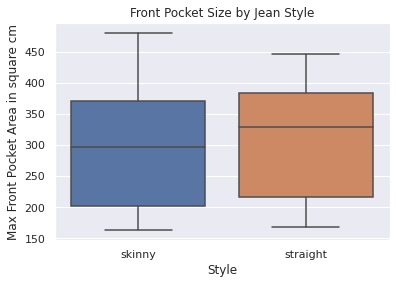

In [ ]:
# create box plots for max front pocket area in both styles to show distribution of values 
ax = sns.boxplot(y=df["maxAreaFront"], x=df["style"])
# rename axis labels
ax.set(ylabel = "Max Front Pocket Area in square cm", xlabel = "Style", title = "Front Pocket Size by Jean Style")

[Text(0, 0.5, 'Max Back Pocket Area in square cm'),
 Text(0.5, 0, 'Style'),
 Text(0.5, 1.0, 'Back Pocket Size by Jean Style')]

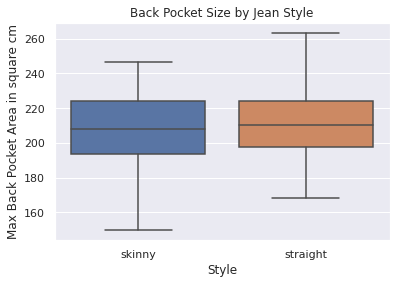

In [ ]:
# create box plots for max back pocket area in both styles to show distribution of values
ax = sns.boxplot(y=df["maxAreaBack"], x=df["style"])
# rename axis labels
ax.set(ylabel = "Max Back Pocket Area in square cm", xlabel = "Style", title = "Back Pocket Size by Jean Style")

These box plots highlight how close the size of pockets are between skinny and straight leg jeans

In [ ]:
# retrieving a list of unique brand names and then sorting them in ascending order alphabetically to use 
# in ordering our bar plots
b= df["brand"].unique()
print(sorted(b))

['7 for All Mankind', 'Abercrombie', 'American Eagle', 'Arizona', 'Buckle Black', 'Calvin Klein', 'Express', 'Gap', 'Guess', 'H&M', 'J. Crew', 'Lee', "Levi's", 'Lucky', 'Old Navy', 'Ralph Lauren', 'Tommy Hilfiger', 'True Religion', 'Uniqlo', 'Wrangler']


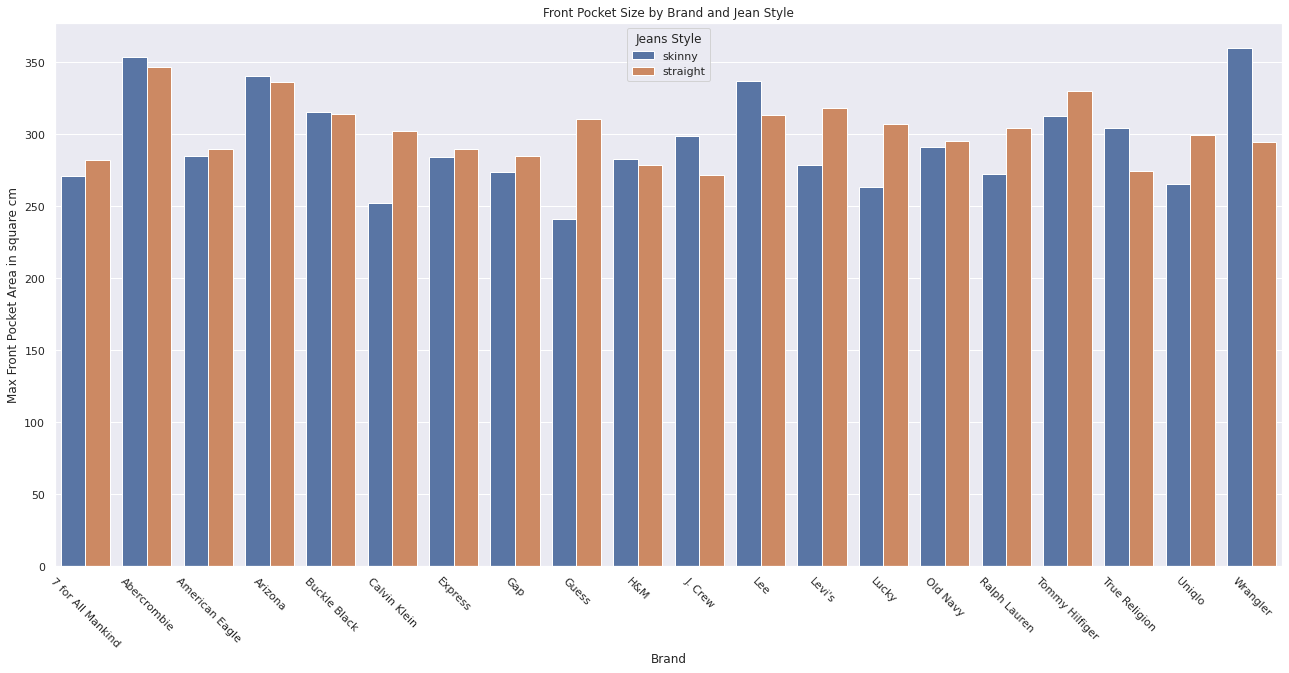

In [ ]:
# import libraries
from numpy.ma.core import mean
import matplotlib.pyplot as plt

# create a bar chart showing front pocket size across brands and jean styles
plt.figure(figsize=(22,10))
ax = sns.barplot(x="brand", y="maxAreaFront", hue="style", ci=None, data=df, order=['7 for All Mankind', 'Abercrombie', 'American Eagle', 'Arizona', 'Buckle Black', 'Calvin Klein', 'Express', 'Gap', 'Guess', 'H&M', 'J. Crew', 'Lee', "Levi's", 'Lucky', 'Old Navy', 'Ralph Lauren', 'Tommy Hilfiger', 'True Religion', 'Uniqlo', 'Wrangler'])
ax.set(ylabel= "Max Front Pocket Area in square cm", xlabel = "Brand", title = "Front Pocket Size by Brand and Jean Style")
ax.legend(title='Jeans Style')
plt.xticks(rotation=-45)
plt.show()

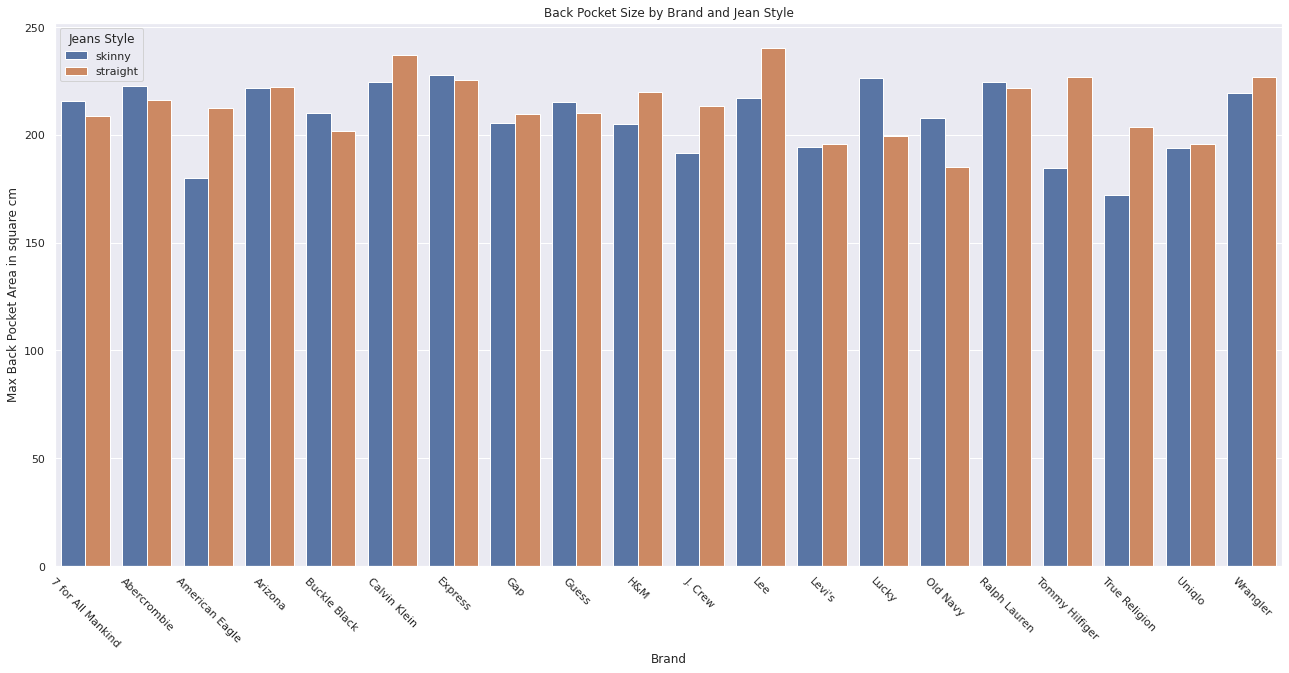

In [ ]:
# import libraries
from numpy.ma.core import mean
import matplotlib.pyplot as plt

# create a bar chart showing back pocket sizes across brands and jean styles
plt.figure(figsize=(22,10))
ax = sns.barplot(x="brand", y="maxAreaBack", hue="style", ci=None, data=df, order=['7 for All Mankind', 'Abercrombie', 'American Eagle', 'Arizona', 'Buckle Black', 'Calvin Klein', 'Express', 'Gap', 'Guess', 'H&M', 'J. Crew', 'Lee', "Levi's", 'Lucky', 'Old Navy', 'Ralph Lauren', 'Tommy Hilfiger', 'True Religion', 'Uniqlo', 'Wrangler'])
ax.set(ylabel= "Max Back Pocket Area in square cm", xlabel = "Brand", title = "Back Pocket Size by Brand and Jean Style")
ax.legend(title='Jeans Style')
plt.xticks(rotation=-45)
plt.show()

## Hypothesis #1 Conclusion

With 95% confidence, there ***is no*** statistically significant difference in pocket size between skinny and straight leg jeans. Using these insights, we can reject the null hypothesis and prove the alternate to be true

## Hypothesis #2
**Hypothesis:** There is no difference in pocket size between men's and women's jeans.

$H_0$: $\mu_1$  - $\mu_2$ = 0

$H_a$: $\mu_1$ - $\mu_2$ != 0

In these hypotheses, $\mu_1$ and $\mu_2$ are referring to max pocket area in men's and women's jeans respectively

In [ ]:
# splitting the DataFrame into two sample populations based on gender
wjeans = df.loc[df["menWomen"]=="women"]
mjeans = df.loc[df["menWomen"]=="men"]
wjeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 77
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             40 non-null     object 
 1   style             40 non-null     object 
 2   menWomen          40 non-null     object 
 3   name              40 non-null     object 
 4   fabric            40 non-null     object 
 5   price             40 non-null     float64
 6   maxHeightFront    40 non-null     float64
 7   minHeightFront    40 non-null     float64
 8   rivetHeightFront  40 non-null     float64
 9   maxWidthFront     40 non-null     float64
 10  minWidthFront     40 non-null     float64
 11  minAreaFront      40 non-null     float64
 12  maxAreaFront      40 non-null     float64
 13  maxHeightBack     40 non-null     float64
 14  minHeightBack     40 non-null     float64
 15  maxWidthBack      40 non-null     float64
 16  minWidthBack      40 non-null     float64
 17 

In [ ]:
# independent samples t-test on max front pocket area by gender
stats.ttest_ind(wjeans["maxAreaFront"], mjeans["maxAreaFront"])

Ttest_indResult(statistic=-17.217516127675193, pvalue=2.7130561416957525e-28)

In [ ]:
# independent samples t-test on max back pocket area by gender
stats.ttest_ind(wjeans["maxAreaBack"], mjeans["maxAreaBack"])

Ttest_indResult(statistic=-4.0597967872891125, pvalue=0.00011587923122639593)

There is a statistically significant difference in pocket size in both front and back pockets between men's and women's jeans

In [ ]:
# defining variables for confidence interval function in men and women's front pocket sizes
sample_1_n = wjeans.shape[0]
sample_2_n = mjeans.shape[0]
sample_1_mean = wjeans["maxAreaFront"].mean()
sample_2_mean = mjeans["maxAreaFront"].mean()
sample_1_var = wjeans["maxAreaFront"].var()
sample_2_var = mjeans["maxAreaFront"].var()

In [ ]:
# calling 95% confidence interval function by gender and returning the result
get_95_ci(wjeans["maxAreaFront"],mjeans["maxAreaFront"])

'The difference in means at the 95% confidence interval (two-tail) is between 142.17789597424527 and 178.70660402575456.'

In [ ]:
# defining variables for confidence interval function in men and women's back pocket sizes
sample_1_n = wjeans.shape[0]
sample_2_n = mjeans.shape[0]
sample_1_mean = wjeans["maxAreaBack"].mean()
sample_2_mean = mjeans["maxAreaBack"].mean()
sample_1_var = wjeans["maxAreaBack"].var()
sample_2_var = mjeans["maxAreaBack"].var()

In [ ]:
# calling 95% confidence interval function by gender and returning the result
get_95_ci(wjeans["maxAreaBack"],mjeans["maxAreaBack"])

'The difference in means at the 95% confidence interval (two-tail) is between 9.251722931116088 and 26.523277068883946.'

[Text(0, 0.5, 'Max Front Pocket Area in square cm'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Front Pocket Size by Gender')]

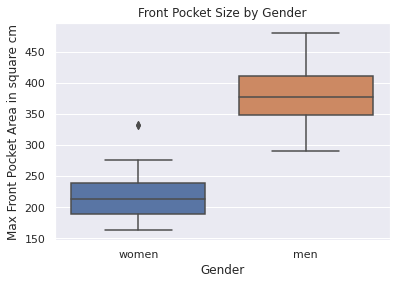

In [ ]:
# create box plots for max front pocket area for both genders to show distribution of values
ax = sns.boxplot(y=df["maxAreaFront"], x=df["menWomen"])
# rename axis labels
ax.set(ylabel = "Max Front Pocket Area in square cm", xlabel= "Gender", title = "Front Pocket Size by Gender")

[Text(0, 0.5, 'Max Back Pocket Area in square cm'),
 Text(0.5, 0, 'Gender'),
 Text(0.5, 1.0, 'Back Pocket Size by Gender')]

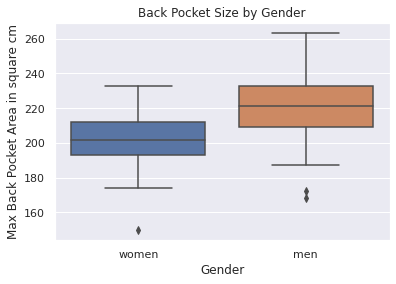

In [ ]:
# create box plots for max back pocket area for both genders to show distribution of values
ax = sns.boxplot(y=df["maxAreaBack"], x=df["menWomen"])
# rename axis labels
ax.set(ylabel = "Max Back Pocket Area in square cm", xlabel= "Gender", title = "Back Pocket Size by Gender")

Using these box plots, you can see the very evident difference in pocket size between men's and women's jeans. The size difference in back pocket size is significant but even more so in the front pocket dimensions

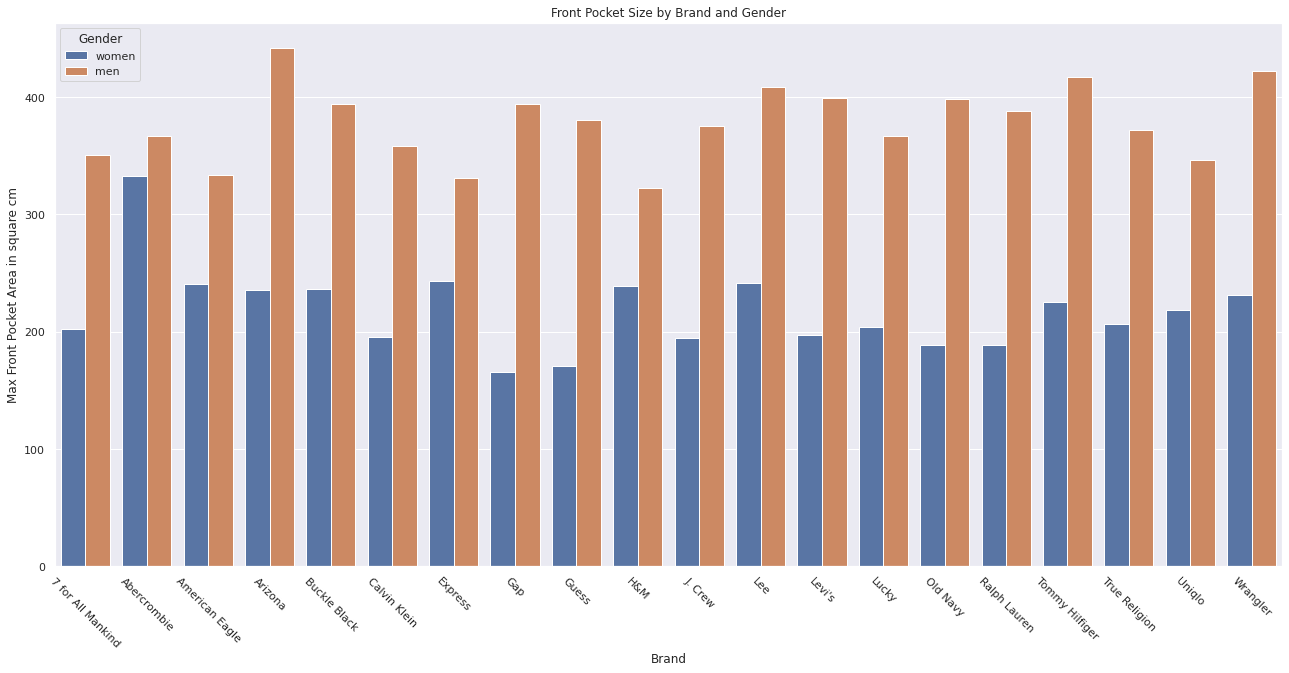

In [ ]:
# import libraries
from numpy.ma.core import mean
import matplotlib.pyplot as plt

# create a bar chart showing front pocket sizes across brands for both genders
plt.figure(figsize=(22,10))
ax = sns.barplot(x="brand", y="maxAreaFront", hue="menWomen", ci=None, data=df, order=['7 for All Mankind', 'Abercrombie', 'American Eagle', 'Arizona', 'Buckle Black', 'Calvin Klein', 'Express', 'Gap', 'Guess', 'H&M', 'J. Crew', 'Lee', "Levi's", 'Lucky', 'Old Navy', 'Ralph Lauren', 'Tommy Hilfiger', 'True Religion', 'Uniqlo', 'Wrangler'])
ax.set(ylabel= "Max Front Pocket Area in square cm", xlabel = "Brand", title = "Front Pocket Size by Brand and Gender")
ax.legend(title='Gender')
plt.xticks(rotation=-45)
plt.show()

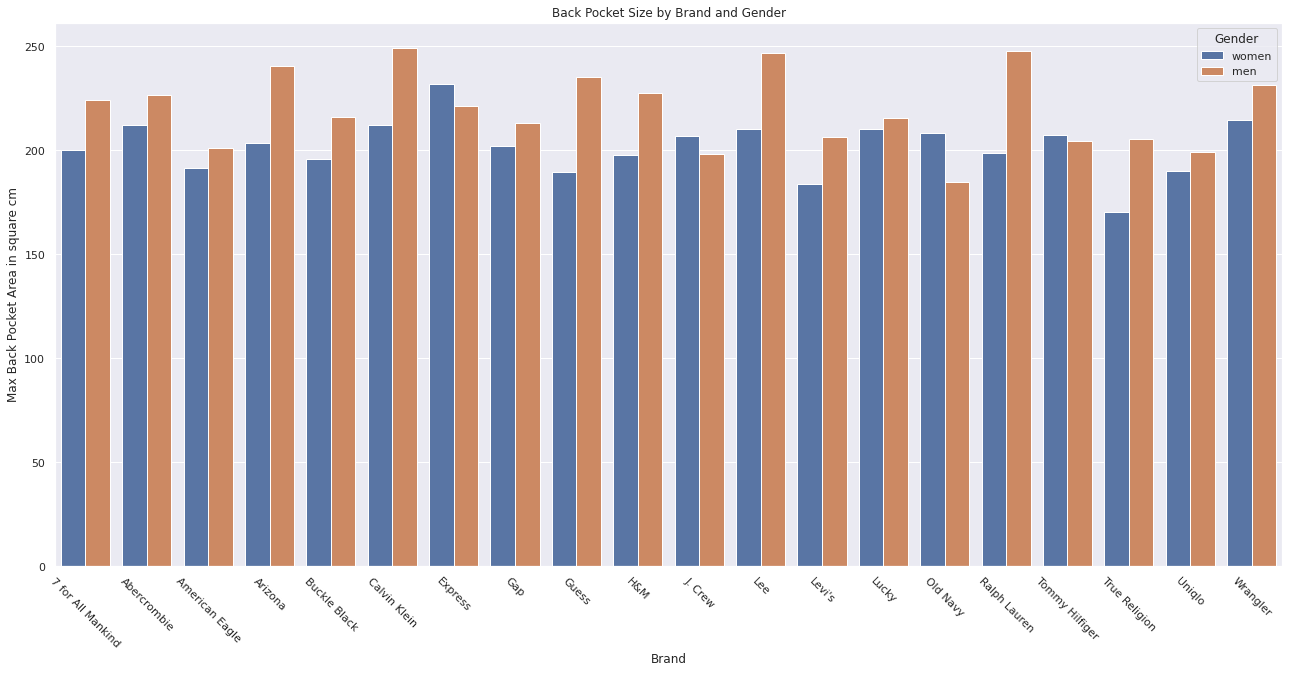

In [ ]:
# import libraries
from numpy.ma.core import mean
import matplotlib.pyplot as plt

# create a bar chart showing back pocket sizes across brands for both genders
plt.figure(figsize=(22,10))
ax = sns.barplot(x="brand", y="maxAreaBack", hue="menWomen", ci=None, data=df, order=['7 for All Mankind', 'Abercrombie', 'American Eagle', 'Arizona', 'Buckle Black', 'Calvin Klein', 'Express', 'Gap', 'Guess', 'H&M', 'J. Crew', 'Lee', "Levi's", 'Lucky', 'Old Navy', 'Ralph Lauren', 'Tommy Hilfiger', 'True Religion', 'Uniqlo', 'Wrangler'])
ax.set(ylabel= "Max Back Pocket Area in square cm", xlabel = "Brand", title = "Back Pocket Size by Brand and Gender")
ax.legend(title='Gender')
plt.xticks(rotation=-45)
plt.show()

These bar plots visualize the disparity in pocket sizes between men's and women's jeans by brands measured. In most brands, the men's front pocket size is much larger than the women's. Men's back pockets are larger as well, on average but not to the same extent as the front pockets

In [ ]:
# Top 5 brands of women's jeans ordered by max front pocket area
# wjeans = df.loc[df["menWomen"]=="women"]
# mjeans = df.loc[df["menWomen"]=="men"]
top_5_wpockets = wjeans.nlargest(5,"maxAreaFront")
top_5_wpockets.loc[:,["brand", "style", "name", "price", "maxAreaFront"]].head()

,brand,style,name,price,maxAreaFront
34,Abercrombie,skinny,Simone High Rise Slim,88.00,333.25
35,Abercrombie,straight,Simone High Rise Ankle Straight,78.00,333.00
25,H&M,skinny,Skinny Ankle High Waist,9.99,275.50
32,American Eagle,skinny,Ne(x)t Level Stretch Skinny,39.95,266.00
5,Uniqlo,straight,High-Rise Straight,39.90,255.75


These are the top five women's jeans from the study in order of descending front pocket size

In [ ]:
# Top 5 brands of men's jeans ordered by max front pocket area
top_5_mpockets = mjeans.nlargest(5,"maxAreaFront")
top_5_mpockets.loc[:,["brand", "style", "name", "price", "maxAreaFront"]].head()

,brand,style,name,price,maxAreaFront
74,Wrangler,skinny,Slim Fit,58.0,481.25
43,Guess,straight,Regular Straight,98.0,446.25
38,Arizona,skinny,Skinny Fit,50.0,442.00
39,Arizona,straight,Original Bootcut,50.0,441.00
47,Levi's,straight,569 Loose Straight,59.5,429.00


These are the top five men's jeans from the study in order of descending front pocket size

In [ ]:
# calculate the average percent difference in front pocket size between men and women's jeans
percent_diff = ((mjeans["maxAreaFront"].mean() - wjeans["maxAreaFront"].mean()) / wjeans["maxAreaFront"].mean()) * 100
print(percent_diff)

73.60875823665356


On average, the front pockets in men's jeans are 74% larger than the front pockets in women's jeans

In [ ]:
# calculate the average percent difference in back pocket size between men and women's jeans
percent_diff = ((mjeans["maxAreaBack"].mean() - wjeans["maxAreaBack"].mean()) / wjeans["maxAreaBack"].mean()) * 100
print(percent_diff)

8.863040933499331


On average, the back pockets in men's jeans are 9% larger than the back pockets in women's jeans

## Hypothesis #2 Conclusion

With 95% confidence, there ***is*** a significant difference in pocket size between men's and women's jeans. Using these insights, we can prove the null hypothesis to be true

## Results

There is no significant difference in pocket size across jean styles

The difference in pocket size between men's and wome's jeans ***is*** significantly different. On average, men have 74% larger front pockets than women and 9% larger back pockets

## Recommendations

I recommend jeans manufacturers increase the pocket size in women's jeans. Not all women carry purses, so fake/no pockets or tiny pockets need to be a thing of the past. Women around the world want bigger pockets, social media has spoken! Until manufacturers catch on, women wanting larger pockets in their jeans could choose a pair from the top five list I created or try on a pair of men's skinny jeans